In [214]:
import pandas as pd
import numpy as np
import os

In [215]:
df = pd.read_csv('data/ted_data.csv')

In [216]:
df

,Wk,Day,Date,Time,Home,xG,Score,xG.1,Away,Attendance,Venue,Referee,Season
0,1.0,Fri,2018-08-10,20:00,Manchester Utd,1.5,2–1,1.8,Leicester City,74439.0,Old Trafford,Andre Marriner,2018-2019
1,1.0,Sat,2018-08-11,12:30,Newcastle Utd,1.0,1–2,2.0,Tottenham,51749.0,St. James' Park,Martin Atkinson,2018-2019
2,1.0,Sat,2018-08-11,15:00,Fulham,0.7,0–2,1.0,Crystal Palace,24821.0,Craven Cottage,Mike Dean,2018-2019
3,1.0,Sat,2018-08-11,15:00,Bournemouth,2.2,2–0,1.4,Cardiff City,10353.0,Vitality Stadium,Kevin Friend,2018-2019
4,1.0,Sat,2018-08-11,15:00,Watford,1.2,2–0,0.3,Brighton,20051.0,Vicarage Road Stadium,Jonathan Moss,2018-2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2655,38.0,Sun,2025-05-25,16:00,Fulham,NaN,NaN,NaN,Manchester City,NaN,Craven Cottage,NaN,2024-2025
2656,38.0,Sun,2025-05-25,16:00,Nott'ham Forest,NaN,NaN,NaN,Chelsea,NaN,The City Ground,NaN,2024-2025
2657,38.0,Sun,2025-05-25,16:00,Manchester Utd,NaN,NaN,NaN,Aston Villa,NaN,Old Trafford,NaN,2024-2025
2658,38.0,Sun,2025-05-25,16:00,Wolves,NaN,NaN,NaN,Brentford,NaN,Molineux Stadium,NaN,2024-2025


In [217]:
# print null values
df.isnull().sum()

Wk              0
Day             0
Date            0
Time            0
Home            0
xG            300
Score         300
xG.1          300
Away            0
Attendance    741
Venue           0
Referee       300
Season          0
dtype: int64

In [218]:
# create a variable called current day
current_day = pd.to_datetime('today').date()

# convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date']).dt.date

# create a new df filter out the rows where the date is greater than the current day
model_df = df[df['Date'] <= current_day]

In [219]:
model_df.isnull().sum()

Wk              0
Day             0
Date            0
Time            0
Home            0
xG              0
Score           0
xG.1            0
Away            0
Attendance    441
Venue           0
Referee         0
Season          0
dtype: int64

In [220]:
model_df[model_df.isnull().any(axis=1)]

,Wk,Day,Date,Time,Home,xG,Score,xG.1,Away,Attendance,Venue,Referee,Season
668,28.0,Wed,2020-06-17,18:00,Aston Villa,1.4,0–0,0.3,Sheffield Utd,NaN,Villa Park,Michael Oliver,2019-2020
669,28.0,Wed,2020-06-17,20:15,Manchester City,2.6,3–0,0.3,Arsenal,NaN,Etihad Stadium,Anthony Taylor,2019-2020
670,30.0,Fri,2020-06-19,18:00,Norwich City,0.6,0–3,1.7,Southampton,NaN,Carrow Road,Kevin Friend,2019-2020
671,30.0,Fri,2020-06-19,20:15,Tottenham,0.4,1–1,1.7,Manchester Utd,NaN,Tottenham Hotspur Stadium,Jonathan Moss,2019-2020
672,30.0,Sat,2020-06-20,12:30,Watford,1.3,1–1,1.0,Leicester City,NaN,Vicarage Road Stadium,Craig Pawson,2019-2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1116,36.0,Sun,2021-05-16,12:00,Crystal Palace,1.9,3–2,1.4,Aston Villa,NaN,Selhurst Park,David Coote,2020-2021
1117,36.0,Sun,2021-05-16,14:05,Tottenham,3.2,2–0,0.9,Wolves,NaN,Tottenham Hotspur Stadium,Martin Atkinson,2020-2021
1118,36.0,Sun,2021-05-16,16:30,West Brom,1.0,1–2,1.9,Liverpool,NaN,The Hawthorns,Mike Dean,2020-2021
1119,36.0,Sun,2021-05-16,19:00,Everton,1.4,0–1,1.2,Sheffield Utd,NaN,Goodison Park,Jonathan Moss,2020-2021


In [221]:
model_df['Attendance'] = model_df['Attendance'].fillna(0) # setting null values to 0 because the NaN are from Covid-19 games with no attendance

model_df['Attendance'] = model_df['Attendance'].astype(int)

/var/folders/ky/0j3p160j7vl9mg1glj79h0q40000gn/T/ipykernel_88315/3374579801.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['Attendance'] = model_df['Attendance'].fillna(0) # setting null values to 0 because the NaN are from Covid-19 games with no attendance
/var/folders/ky/0j3p160j7vl9mg1glj79h0q40000gn/T/ipykernel_88315/3374579801.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['Attendance'] = model_df['Attendance'].astype(int)


In [222]:
model_df[['home_goals', 'away_goals']] = model_df['Score'].str.split('–', expand=True).astype(int)

# rename xG and xG.1 columns to home_xG and away_xG
model_df.rename(columns={'xG': 'home_xg', 'xG.1': 'away_xg'}, inplace=True)

/var/folders/ky/0j3p160j7vl9mg1glj79h0q40000gn/T/ipykernel_88315/838135310.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df[['home_goals', 'away_goals']] = model_df['Score'].str.split('–', expand=True).astype(int)
/var/folders/ky/0j3p160j7vl9mg1glj79h0q40000gn/T/ipykernel_88315/838135310.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df[['home_goals', 'away_goals']] = model_df['Score'].str.split('–', expand=True).astype(int)
/var/folders/ky/0j3p160j7vl9mg1glj79h0q40000gn/T/ipykernel_8

In [223]:
def get_result(row):
    if row['home_goals'] > row['away_goals']:
        return 'Home Win'
    elif row['home_goals'] < row['away_goals']:
        return 'Away Win'
    else:
        return 'Draw'
    
model_df['Result'] = model_df.apply(get_result, axis=1)

/var/folders/ky/0j3p160j7vl9mg1glj79h0q40000gn/T/ipykernel_88315/2600445915.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['Result'] = model_df.apply(get_result, axis=1)


In [224]:
model_df

,Wk,Day,Date,Time,Home,home_xg,Score,away_xg,Away,Attendance,Venue,Referee,Season,home_goals,away_goals,Result
0,1.0,Fri,2018-08-10,20:00,Manchester Utd,1.5,2–1,1.8,Leicester City,74439,Old Trafford,Andre Marriner,2018-2019,2,1,Home Win
1,1.0,Sat,2018-08-11,12:30,Newcastle Utd,1.0,1–2,2.0,Tottenham,51749,St. James' Park,Martin Atkinson,2018-2019,1,2,Away Win
2,1.0,Sat,2018-08-11,15:00,Fulham,0.7,0–2,1.0,Crystal Palace,24821,Craven Cottage,Mike Dean,2018-2019,0,2,Away Win
3,1.0,Sat,2018-08-11,15:00,Bournemouth,2.2,2–0,1.4,Cardiff City,10353,Vitality Stadium,Kevin Friend,2018-2019,2,0,Home Win
4,1.0,Sat,2018-08-11,15:00,Watford,1.2,2–0,0.3,Brighton,20051,Vicarage Road Stadium,Jonathan Moss,2018-2019,2,0,Home Win
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2355,8.0,Sat,2024-10-19,15:00,Manchester Utd,1.3,2–1,0.9,Brentford,73738,Old Trafford,Samuel Barrott,2024-2025,2,1,Home Win
2356,8.0,Sat,2024-10-19,17:30,Bournemouth,1.8,2–0,0.7,Arsenal,11235,Vitality Stadium,Robert Jones,2024-2025,2,0,Home Win
2357,8.0,Sun,2024-10-20,14:00,Wolves,0.8,1–2,1.6,Manchester City,31319,Molineux Stadium,Chris Kavanagh,2024-2025,1,2,Away Win
2358,8.0,Sun,2024-10-20,16:30,Liverpool,1.9,2–1,1.0,Chelsea,60277,Anfield,John Brooks,2024-2025,2,1,Home Win


In [225]:
model_df['Day'] = pd.to_datetime(model_df['Date']).dt.day_name()

model_df['Season'] = model_df['Season'].apply(lambda x: x.split('-')[1])

/var/folders/ky/0j3p160j7vl9mg1glj79h0q40000gn/T/ipykernel_88315/1618590677.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['Day'] = pd.to_datetime(model_df['Date']).dt.day_name()
/var/folders/ky/0j3p160j7vl9mg1glj79h0q40000gn/T/ipykernel_88315/1618590677.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['Season'] = model_df['Season'].apply(lambda x: x.split('-')[1])


In [226]:
model_df

,Wk,Day,Date,Time,Home,home_xg,Score,away_xg,Away,Attendance,Venue,Referee,Season,home_goals,away_goals,Result
0,1.0,Friday,2018-08-10,20:00,Manchester Utd,1.5,2–1,1.8,Leicester City,74439,Old Trafford,Andre Marriner,2019,2,1,Home Win
1,1.0,Saturday,2018-08-11,12:30,Newcastle Utd,1.0,1–2,2.0,Tottenham,51749,St. James' Park,Martin Atkinson,2019,1,2,Away Win
2,1.0,Saturday,2018-08-11,15:00,Fulham,0.7,0–2,1.0,Crystal Palace,24821,Craven Cottage,Mike Dean,2019,0,2,Away Win
3,1.0,Saturday,2018-08-11,15:00,Bournemouth,2.2,2–0,1.4,Cardiff City,10353,Vitality Stadium,Kevin Friend,2019,2,0,Home Win
4,1.0,Saturday,2018-08-11,15:00,Watford,1.2,2–0,0.3,Brighton,20051,Vicarage Road Stadium,Jonathan Moss,2019,2,0,Home Win
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2355,8.0,Saturday,2024-10-19,15:00,Manchester Utd,1.3,2–1,0.9,Brentford,73738,Old Trafford,Samuel Barrott,2025,2,1,Home Win
2356,8.0,Saturday,2024-10-19,17:30,Bournemouth,1.8,2–0,0.7,Arsenal,11235,Vitality Stadium,Robert Jones,2025,2,0,Home Win
2357,8.0,Sunday,2024-10-20,14:00,Wolves,0.8,1–2,1.6,Manchester City,31319,Molineux Stadium,Chris Kavanagh,2025,1,2,Away Win
2358,8.0,Sunday,2024-10-20,16:30,Liverpool,1.9,2–1,1.0,Chelsea,60277,Anfield,John Brooks,2025,2,1,Home Win


In [227]:
model_df = pd.get_dummies(model_df, columns=['Day'])

In [228]:
model_df.reset_index(drop=True, inplace=True)

In [229]:
for x in model_df.Home.unique():
    temp_df = model_df[(model_df['Home'] == x) | (model_df['Away'] == x)]
    temp_df = temp_df.sort_values(['Date'])

    temp_df['goal_value_to_calculate'] = temp_df.apply(lambda y: y['home_goals'] if y['Home'] == x else y['away_goals'], axis=1)
    temp_df['rolling_avg_goals'] = temp_df['goal_value_to_calculate'].rolling(window = 5, closed = 'left', min_periods = 1).mean()

    for index, row in temp_df.iterrows():
        if row['Home'] == x:
            model_df.at[index, 'home_rolling_avg_goals'] = row['rolling_avg_goals']
        else:
            model_df.at[index, 'away_rolling_avg_goals'] = row['rolling_avg_goals']

In [230]:
for x in model_df.Home.unique():
    temp_df = model_df[(model_df['Home'] == x) | (model_df['Away'] == x)]
    temp_df = temp_df.sort_values(['Date'])

    temp_df['xg_value_to_calculate'] = temp_df.apply(lambda y: y['home_xg'] if y['Home'] == x else y['away_xg'], axis=1)
    temp_df['rolling_avg_xG'] = temp_df['xg_value_to_calculate'].rolling(window = 5, closed = 'left', min_periods = 1).mean()

    for index, row in temp_df.iterrows():
        if row['Home'] == x:
            model_df.at[index, 'home_rolling_avg_xG'] = row['rolling_avg_xG']
        else:
            model_df.at[index, 'away_rolling_avg_xG'] = row['rolling_avg_xG']

In [231]:
model_df = model_df.dropna(subset=['home_rolling_avg_goals', 'away_rolling_avg_goals', 'home_rolling_avg_xG', 'away_rolling_avg_xG'])

In [232]:
# create a new column for the central moving average of the home goals
model_df['home_goals_cma'] = model_df['home_goals'].expanding().mean()
model_df['home_xg_cma'] = model_df['home_xg'].expanding().mean()

# away goals
model_df['away_goals_cma'] = model_df['away_goals'].expanding().mean()
model_df['away_xg_cma'] = model_df['away_xg'].expanding().mean()

# create a new column by dividing the home goals by central moving average
model_df['home_goals_div_cma'] = model_df['home_goals'] / model_df['home_goals_cma']
model_df['home_xg_div_cma'] = model_df['home_xg'] / model_df['home_xg_cma']

# away goals
model_df['away_goals_div_cma'] = model_df['away_goals'] / model_df['away_goals_cma']
model_df['away_xg_div_cma'] = model_df['away_xg'] / model_df['away_xg_cma']

In [233]:
# set Wk column to integer
model_df['Wk'] = model_df['Wk'].astype(int)

# create a new column called quarter. divide the season into 4 quarters using the Wk column and assign a value between 1 and 4
model_df['quarter'] = np.where(model_df['Wk'].astype(int) <= 9, 1,
                np.where(model_df['Wk'].astype(int) <= 18, 2,
                np.where(model_df['Wk'].astype(int) <= 27, 3, 4)))

# using home_goals_div_cma, take the mean of the column for each quarter. put into new column called home_goals_seasonality
model_df['home_goals_seasonality'] = model_df.groupby('quarter')['home_goals_div_cma'].transform('mean')
model_df['home_xg_seasonality'] = model_df.groupby('quarter')['home_xg_div_cma'].transform('mean')

# away goals
model_df['away_goals_seasonality'] = model_df.groupby('quarter')['away_goals_div_cma'].transform('mean')
model_df['away_xg_seasonality'] = model_df.groupby('quarter')['away_xg_div_cma'].transform('mean')

# create a new column called home_goals_deseasonalised by dividing home_goals by home_goals_seasonality
model_df['home_goals_deseasonalised'] = model_df['home_goals'] / model_df['home_goals_seasonality']
model_df['home_xg_deseasonalised'] = model_df['home_xg'] / model_df['home_xg_seasonality']

# away goals
model_df['away_goals_deseasonalised'] = model_df['away_goals'] / model_df['away_goals_seasonality']
model_df['away_xg_deseasonalised'] = model_df['away_xg'] / model_df['away_xg_seasonality']

In [234]:
display(model_df)

,Wk,Date,Time,Home,home_xg,Score,away_xg,Away,Attendance,Venue,...,away_xg_div_cma,quarter,home_goals_seasonality,home_xg_seasonality,away_goals_seasonality,away_xg_seasonality,home_goals_deseasonalised,home_xg_deseasonalised,away_goals_deseasonalised,away_xg_deseasonalised
10,2,2018-08-18,12:30,Cardiff City,0.9,0–0,1.6,Newcastle Utd,30720,Cardiff City Stadium,...,1.000000,1,1.012575,1.01772,1.047358,1.030433,0.000000,0.884329,0.000000,1.552745
11,2,2018-08-18,15:00,West Ham,1.2,1–2,1.3,Bournemouth,56888,London Stadium,...,0.896552,1,1.012575,1.01772,1.047358,1.030433,0.987581,1.179106,1.909567,1.261605
12,2,2018-08-18,15:00,Everton,1.5,2–1,1.7,Southampton,38601,Goodison Park,...,1.108696,1,1.012575,1.01772,1.047358,1.030433,1.975162,1.473882,0.954784,1.649791
13,2,2018-08-18,15:00,Leicester City,0.2,2–0,1.1,Wolves,32043,King Power Stadium,...,0.771930,1,1.012575,1.01772,1.047358,1.030433,1.975162,0.196518,0.000000,1.067512
14,2,2018-08-18,15:00,Tottenham,2.9,3–1,1.6,Fulham,58297,Wembley Stadium,...,1.095890,1,1.012575,1.01772,1.047358,1.030433,2.962743,2.849506,0.954784,1.552745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2355,8,2024-10-19,15:00,Manchester Utd,1.3,2–1,0.9,Brentford,73738,Old Trafford,...,0.717042,1,1.012575,1.01772,1.047358,1.030433,1.975162,1.277365,0.954784,0.873419
2356,8,2024-10-19,17:30,Bournemouth,1.8,2–0,0.7,Arsenal,11235,Vitality Stadium,...,0.557805,1,1.012575,1.01772,1.047358,1.030433,1.975162,1.768659,0.000000,0.679326
2357,8,2024-10-20,14:00,Wolves,0.8,1–2,1.6,Manchester City,31319,Molineux Stadium,...,1.274833,1,1.012575,1.01772,1.047358,1.030433,0.987581,0.786071,1.909567,1.552745
2358,8,2024-10-20,16:30,Liverpool,1.9,2–1,1.0,Chelsea,60277,Anfield,...,0.796840,1,1.012575,1.01772,1.047358,1.030433,1.975162,1.866918,0.954784,0.970465


In [235]:
model_df['Season'] = model_df['Season'].astype(int)
# set home goals and away goals to integer
model_df['home_goals'] = model_df['home_goals'].astype(int)
model_df['away_goals'] = model_df['away_goals'].astype(int)

In [236]:
# Ensure 'Result' is categorical or integer-based
model_df['Result'] = model_df['Result'].astype('category')  # or use int depending on your encoding

# Ensure 'home_goals' and 'away_goals' are integers
model_df['home_goals'] = pd.to_numeric(model_df['home_goals'], errors='coerce').fillna(0).astype(int)
model_df['away_goals'] = pd.to_numeric(model_df['away_goals'], errors='coerce').fillna(0).astype(int)


In [237]:
# import packages for random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [238]:
model_df.columns

Index(['Wk', 'Date', 'Time', 'Home', 'home_xg', 'Score', 'away_xg', 'Away',
       'Attendance', 'Venue', 'Referee', 'Season', 'home_goals', 'away_goals',
       'Result', 'Day_Friday', 'Day_Monday', 'Day_Saturday', 'Day_Sunday',
       'Day_Thursday', 'Day_Tuesday', 'Day_Wednesday',
       'home_rolling_avg_goals', 'away_rolling_avg_goals',
       'home_rolling_avg_xG', 'away_rolling_avg_xG', 'home_goals_cma',
       'home_xg_cma', 'away_goals_cma', 'away_xg_cma', 'home_goals_div_cma',
       'home_xg_div_cma', 'away_goals_div_cma', 'away_xg_div_cma', 'quarter',
       'home_goals_seasonality', 'home_xg_seasonality',
       'away_goals_seasonality', 'away_xg_seasonality',
       'home_goals_deseasonalised', 'home_xg_deseasonalised',
       'away_goals_deseasonalised', 'away_xg_deseasonalised'],
      dtype='object')

In [239]:
features = [column for column in model_df.drop(columns=[
    'Date', 'Time', 'Referee', 'home_xg', 'away_xg','Home', 'Away', 'home_goals', 
    'away_goals', 'Result', 'Season', 'quarter', 'home_goals_cma', 'home_xg_cma', 'Venue',
    'away_goals_cma', 'away_xg_cma', 'home_goals_div_cma', 'home_xg_div_cma', 'Score',
    'away_goals_div_cma', 'away_xg_div_cma', 'home_goals_seasonality', 'home_xg_seasonality', 
    'away_goals_seasonality', 'away_xg_seasonality', 'home_goals_deseasonalised', 
    'home_xg_deseasonalised', 'away_goals_deseasonalised', 'away_xg_deseasonalised'])]

In [240]:
features

['Wk',
 'Attendance',
 'Day_Friday',
 'Day_Monday',
 'Day_Saturday',
 'Day_Sunday',
 'Day_Thursday',
 'Day_Tuesday',
 'Day_Wednesday',
 'home_rolling_avg_goals',
 'away_rolling_avg_goals',
 'home_rolling_avg_xG',
 'away_rolling_avg_xG']

In [241]:
train_data = model_df[model_df['Season'] <= 2022]
test_data = model_df[model_df['Season'] == 2023]

X_train = train_data[features]
y_train = train_data['Result']

X_test = test_data[features]
y_test = test_data['Result']

In [242]:
X_train.shape

(1504, 13)

In [243]:
clf = RandomForestClassifier(random_state=69)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=69)

In [244]:
predictions = clf.predict(X_test)

print(f'{round((accuracy_score(y_test, predictions)*100), 2)}% accuracy')

46.97% accuracy


In [245]:
print(f'{round((accuracy_score(y_test, predictions)*100), 2)}% accuracy')

46.97% accuracy


In [246]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10 , 15, 20]
}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=69),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'n_estimators': [50, 100, 200]})

In [247]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=5, n_estimators=50, random_state=69)

In [248]:
clf = RandomForestClassifier(random_state=69, max_depth=5, n_estimators=50)
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)

print(f'{round((accuracy_score(y_test, predictions)*100), 2)}% accuracy')

53.83% accuracy


In [249]:
model_df = pd.get_dummies(model_df, columns=['Home', 'Away', 'Referee'])
model_df.head()

,Wk,Date,Time,home_xg,Score,away_xg,Attendance,Venue,Season,home_goals,...,Referee_Robert Madley,Referee_Roger East,Referee_Samuel Allison,Referee_Samuel Barrott,Referee_Simon Hooper,Referee_Stuart Attwell,Referee_Sunny Singh,Referee_Thomas Bramall,Referee_Tim Robinson,Referee_Tony Harrington
10,2,2018-08-18,12:30,0.9,0–0,1.6,30720,Cardiff City Stadium,2019,0,...,False,False,False,False,False,False,False,False,False,False
11,2,2018-08-18,15:00,1.2,1–2,1.3,56888,London Stadium,2019,1,...,False,False,False,False,False,True,False,False,False,False
12,2,2018-08-18,15:00,1.5,2–1,1.7,38601,Goodison Park,2019,2,...,False,False,False,False,False,False,False,False,False,False
13,2,2018-08-18,15:00,0.2,2–0,1.1,32043,King Power Stadium,2019,2,...,False,False,False,False,False,False,False,False,False,False
14,2,2018-08-18,15:00,2.9,3–1,1.6,58297,Wembley Stadium,2019,3,...,False,False,False,False,False,False,False,False,False,False


In [250]:
features = [column for column in model_df.drop(columns=[
    'Date', 'Time', 'home_xg', 'away_xg', 'home_goals', 'Score', 'Venue',
    'away_goals', 'Result', 'Season', 'quarter', 'home_goals_cma', 'home_xg_cma', 
    'away_goals_cma', 'away_xg_cma', 'home_goals_div_cma', 'home_xg_div_cma', 
    'away_goals_div_cma', 'away_xg_div_cma'])]

train_data = model_df[model_df['Season'] <= 2022]
test_data = model_df[model_df['Season'] == 2023]

X_train = train_data[features]
y_train = train_data['Result']

X_test = test_data[features]
y_test = test_data['Result']

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10 , 15, 20]
}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

grid_search.best_params_

{'max_depth': 20, 'n_estimators': 200}

In [251]:
clf = RandomForestClassifier(random_state=69, max_depth=20, n_estimators=200)
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)

print(f'{round((accuracy_score(y_test, predictions)*100), 2)}% accuracy')

91.03% accuracy


# Making predictions on 2024 data

In [252]:
prediction_data = model_df[model_df['Season'] == 2024]

X_test = prediction_data[features]
y_test = prediction_data['Result']

In [253]:
predictions = clf.predict(X_test)

print(f'{round((accuracy_score(y_test, predictions)*100), 2)}% accuracy')

89.45% accuracy


In [254]:
# save the model
import joblib

joblib.dump(clf, 'new_model.pkl')

# save the features
joblib.dump(features, 'new_features.pkl')

['new_features.pkl']

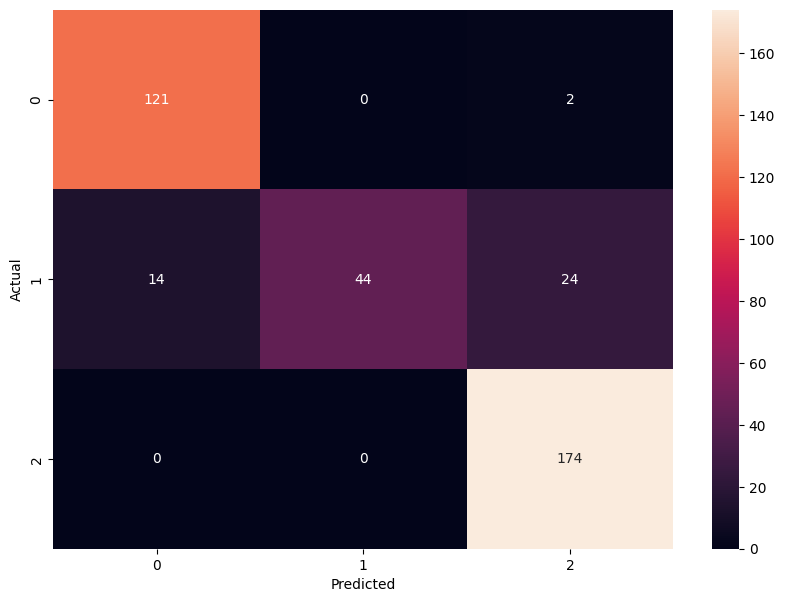

In [255]:
# confusion matrix

confusion_matrix(y_test, predictions)

# importing the packages for the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Neural Nets

In [256]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout

In [260]:
train_data = model_df[model_df['Season'] <= 2022]
test_data = model_df[model_df['Season'] == 2023]

X_train = train_data[features]
y_train = train_data[['Result', 'home_goals', 'away_goals']]

X_test = test_data[features]
y_test = test_data[['Result', 'home_goals', 'away_goals']]